In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_meto = pd.read_csv("meteorite-landings.csv")
data_meto

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [3]:
data_meto.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [4]:
#filtering the columns which has year between 860 and 2016
data_meto = data_meto[(data_meto['year'] >= 860.0) & (data_meto['year'] <= 2016.0)]
#since the year should not have the '0' removing '0' at the end of the year
data_meto['year'] = data_meto['year'].astype(str).str[:-2].astype(str)



C:\Users\sagarika\AppData\Local\Temp\ipykernel_9956\1953485046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_meto['year'] = data_meto['year'].astype(str).str[:-2].astype(str)


In [5]:
#As described in the data card a few entries have latitude and longitude of 0N/0E (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 0N/0E locations should probably be treated as NA.

Iam going to filter out latitudes and longitudes and take out all the weird locations

In [6]:
#filtering the columns whi
data_meto = data_meto[(data_meto['reclong'] <= 180) & (data_meto['reclong'] >= -180) & ((data_meto['reclat'] != 0) | (data_meto['reclong'] != 0))]


#since the year should not have the '0' removing '0' at the end of the year
data_meto['year'] = data_meto['year'].astype(str).str[:-2].astype(str)

In [7]:
data_meto.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,18,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,19,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,19,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,19,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,19,-33.16667,-64.95000,"(-33.166670, -64.950000)"


Performing EDA on Data Set

In [8]:
#cleaning the data set
data_meto.isna().sum()

name             0
id               0
nametype         0
recclass         0
mass           107
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [9]:
mean_mass = data_meto['mass'].mean()
data_meto['mass'].fillna(mean_mass,inplace = True)

In [10]:
#Filling the null values of data frame of lattitudes and longitudes with 0.0 since I dont wish to do the mean and median for this data

In [11]:
reclat = data_meto['reclat'].fillna(0.0,inplace=True)
reclong = data_meto['reclong'].fillna(0.0,inplace=True)
GeoLocation = data_meto['GeoLocation'].fillna(0.0,inplace=True)
data_meto.isna().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [12]:
#I think the ID is unique so im dropping the id column
data_meto = data_meto.drop('id',axis=1)
data_meto

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,18,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,19,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,19,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,19,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,19,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,Valid,Eucrite,172.0,Found,19,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,19,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,Valid,H4,3.3,Found,19,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,Valid,L6,2167.0,Found,20,49.78917,41.50460,"(49.789170, 41.504600)"


<function matplotlib.pyplot.show(close=None, block=None)>

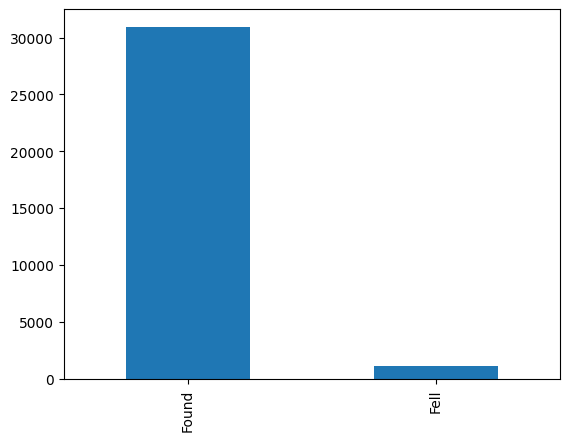

In [13]:
ax = data_meto["fall"].value_counts().plot(kind='bar')
plt.show

In [14]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [15]:
import geopandas as gpd

In [16]:
gdf = gpd.GeoDataFrame(data_meto, 
                       geometry=gpd.points_from_xy(data_meto.reclat, data_meto.reclong))

In [17]:
#Create a new geopandas data frame from the given dataframe
# Create a dictionary to map types to colors and sizes
type_to_color = {'Fell': 'red', 'Found': 'blue'}
type_to_size = {'Fell': 20, 'Found': 20}  # Adjust size values as needed

C:\Users\sagarika\AppData\Local\Temp\ipykernel_9956\2074808111.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


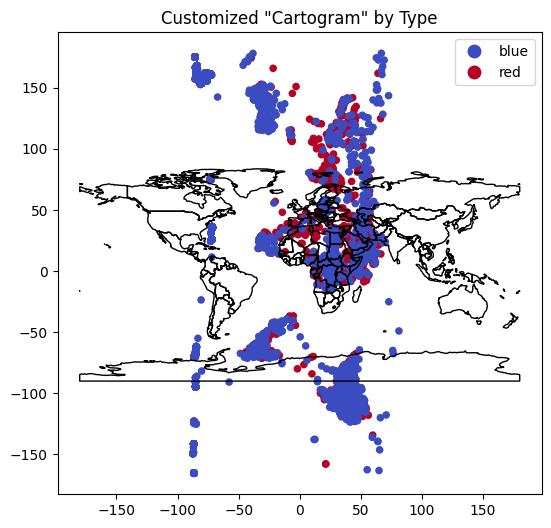

In [18]:
# Apply the mapping to the GeoDataFrame
gdf['Color'] = gdf['fall'].map(type_to_color)
gdf['Size'] = gdf['fall'].map(type_to_size)

# Create a cartogram-like plot with points
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1.0, color='k')  # Plot country boundaries
gdf.plot(column='Color', cmap='coolwarm', markersize=gdf['Size'], legend=True, ax=ax)
ax.set_title('Customized "Cartogram" by Type')
plt.show()

As we can see from the above (cartogram) picture we can say that the found are more than the fell meteroids

checking if there is any difference in the classes of meteroids that have fallen on earth

In [19]:
#choosing only the value of "fell" from the column

In [20]:
df_fall = data_meto[data_meto['fall'] == 'Fell']
df_fall

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,18,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,19,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,19,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,19,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,19,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
1103,Zhuanghe,Valid,H5,2900.0,Fell,19,39.66667,122.98333,"(39.666670, 122.983330)"
1104,Zmenj,Valid,Howardite,246.0,Fell,18,51.83333,26.83333,"(51.833330, 26.833330)"
1105,Zomba,Valid,L6,7500.0,Fell,18,-15.18333,35.28333,"(-15.183330, 35.283330)"
1106,Zsadany,Valid,H5,552.0,Fell,18,46.93333,21.50000,"(46.933330, 21.500000)"


Using mean, mode to find what is the most fallen place for the meteroids

In [21]:
mean = df_fall['reclat'].mean()
print(mean)

30.071265247262772


In [22]:
mean_long = df_fall['reclong'].mean()
print(mean_long)

20.15274667518248


In [23]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [24]:
from geopy.distance import geodesic

In [34]:


# Coordinates of the idea or point you want to compare to
idea_lat = 30.071  # Example latitude
idea_lon = 20.152  # Example longitude


df = pd.DataFrame(df_fall)

# Define a threshold distance (in kilometers) for similarity
threshold_distance = 10000  # Adjust this as needed

# Calculate the distance between the idea coordinates and all locations in the DataFrame
df['Distance'] = df.apply(lambda row: geodesic((idea_lat, idea_lon), (row['reclat'], row['reclong'])).kilometers, axis=1)

# Filter locations that are similar based on the threshold
similar_locations = df[df['Distance'] <= threshold_distance]

# Display the similar locations
print(similar_locations)


                     name nametype   recclass      mass  fall year    reclat  \
0                  Aachen    Valid         L5      21.0  Fell   18  50.77500   
1                  Aarhus    Valid         H6     720.0  Fell   19  56.18333   
2                    Abee    Valid        EH4  107000.0  Fell   19  54.21667   
5                Adhi Kot    Valid        EH4    4239.0  Fell   19  32.10000   
6     Adzhi-Bogdo (stone)    Valid      LL3-6     910.0  Fell   19  44.83333   
...                   ...      ...        ...       ...   ...  ...       ...   
1103             Zhuanghe    Valid         H5    2900.0  Fell   19  39.66667   
1104                Zmenj    Valid  Howardite     246.0  Fell   18  51.83333   
1105                Zomba    Valid         L6    7500.0  Fell   18 -15.18333   
1106              Zsadany    Valid         H5     552.0  Fell   18  46.93333   
1107              Zvonkov    Valid         H6    2568.0  Fell   19  50.20000   

        reclong               GeoLocati

In [35]:
# Assuming you have a DataFrame called 'df' with a column 'Class'
most_common_class = df['recclass'].value_counts().idxmax()

print("The most common value in 'Class' column is:", most_common_class)


The most common value in 'Class' column is: L6


From the above code we can say that L6 is the most common class of meteroids that has fallen on the earth and ideal latitude and longitude location is nearer to (30.0712,20.152)